**Convolutional Neural Network (CNN) on Image Datasets (e.g. MNIST / CIFAR)**

*Baseline Implementation*

Loading dataset from mnist_test.csv...
Data prepared successfully.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Starting Training...
Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.7103 - loss: 0.9126 - val_accuracy: 0.9450 - val_loss: 0.1767
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9640 - loss: 0.1151 - val_accuracy: 0.9645 - val_loss: 0.1192
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9786 - loss: 0.0662 - val_accuracy: 0.9690 - val_loss: 0.0970
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9861 - loss: 0.0421 - val_accuracy: 0.9690 - val_loss: 0.0976
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9914 - loss: 0.0311 - val_accuracy: 0.9790 - val_loss: 0.0749
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9931 - loss: 0.0229 - val_accuracy: 0.9670 - val_loss: 0.1052
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9946 - loss: 0.0166 - val_accuracy: 0.9760 - val_loss: 0.0728
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9968 - loss: 0.

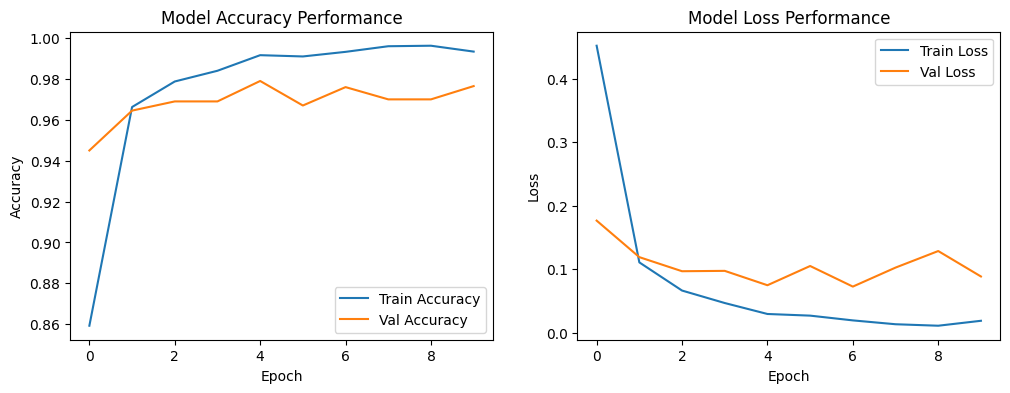

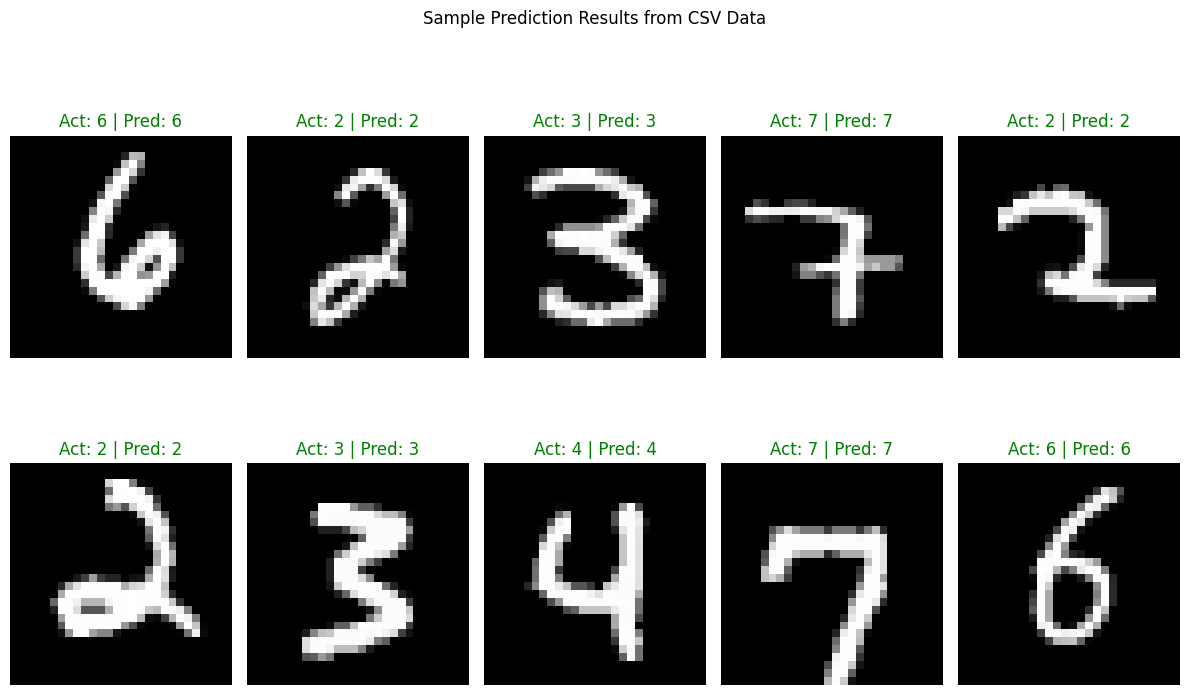

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models

# ==========================================
# 1. DATA LOADING & PREPROCESSING
# ==========================================
def load_data(file_path):
    print(f"Loading dataset from {file_path}...")
    data = pd.read_csv(file_path)

    # Extract labels and pixel data
    y = data.iloc[:, 0].values
    X = data.iloc[:, 1:].values

    # Normalize pixel values (0-255 to 0.0-1.0)
    X = X.astype('float32') / 255.0

    # Reshape for CNN: (Batch, Height, Width, Channels)
    X = X.reshape(-1, 28, 28, 1)

    return X, y

# Load your uploaded file
try:
    # Assuming standard experiment setup with a train file
    # If mnist_train.csv is missing, we split the test file for demonstration
    X_test, y_test = load_data('mnist_test.csv')

    # Safety Check: If you only have the test file, we split it to make the code run
    # In a full experiment, replace this with: X_train, y_train = load_data('mnist_train.csv')
    X_train, X_val, y_train, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state=42)
    print("Data prepared successfully.")
except FileNotFoundError:
    print("Error: mnist_test.csv not found. Please ensure the file is in the working directory.")

# ==========================================
# 2. BASELINE CNN DESIGN (No Tuning)
# ==========================================
model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and Fully Connected Layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # 10 classes for digits 0-9
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ==========================================
# 3. TRAINING
# ==========================================
print("\nStarting Training...")
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_val, y_val),
                    batch_size=32, verbose=1)

# ==========================================
# 4. PERFORMANCE ANALYTICAL METRICS
# ==========================================
print("\n" + "="*30)
print("PERFORMANCE ANALYTICAL METRICS")
print("="*30)

# Evaluate on the validation set
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Final Validation Loss: {loss:.4f}")
print(f"Final Validation Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Detailed Classification Report
y_pred = np.argmax(model.predict(X_val), axis=1)
print("\nDetailed Metrics:")
print(classification_report(y_val, y_pred))

# ==========================================
# 5. VISUAL OUTPUTS
# ==========================================

# Visual 1: Training History Graph
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy Performance')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss Performance')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visual 2: Actual Prediction Results (Image Grid)
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    img = X_val[i].reshape(28, 28)
    actual_label = y_val[i]
    pred_label = y_pred[i]

    color = 'green' if actual_label == pred_label else 'red'

    plt.imshow(img, cmap='gray')
    plt.title(f"Act: {actual_label} | Pred: {pred_label}", color=color)
    plt.axis('off')

plt.suptitle("Sample Prediction Results from CSV Data")
plt.tight_layout()
plt.show()

*Hyperparamter Tuning*

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Starting Optimized Training with Hyperparameter Tuning...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 22s 74ms/step - accuracy: 0.6096 - loss: 1.2664 - val_accuracy: 0.1130 - val_loss: 10.7978 - learning_rate: 0.0010
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9108 - loss: 0.2825 - val_accuracy: 0.1130 - val_loss: 10.5986 - learning_rate: 0.0010
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9426 - loss: 0.1873 - val_accuracy: 0.1650 - val_loss: 4.2405 - learning_rate: 0.0010
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9616 - loss: 0.1350 - val_accuracy: 0.9380 - val_loss: 0.2018 - learning_rate: 0.0010
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9636 - loss: 0.1171 - val_accuracy: 0.9830 - val_loss: 0.0488 - learning_rate: 0.0010
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.9664 - loss: 0.0971 - val_accuracy: 0.9670 - val_loss: 0.1224 - learning_rate: 0.0010
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9706 - loss:

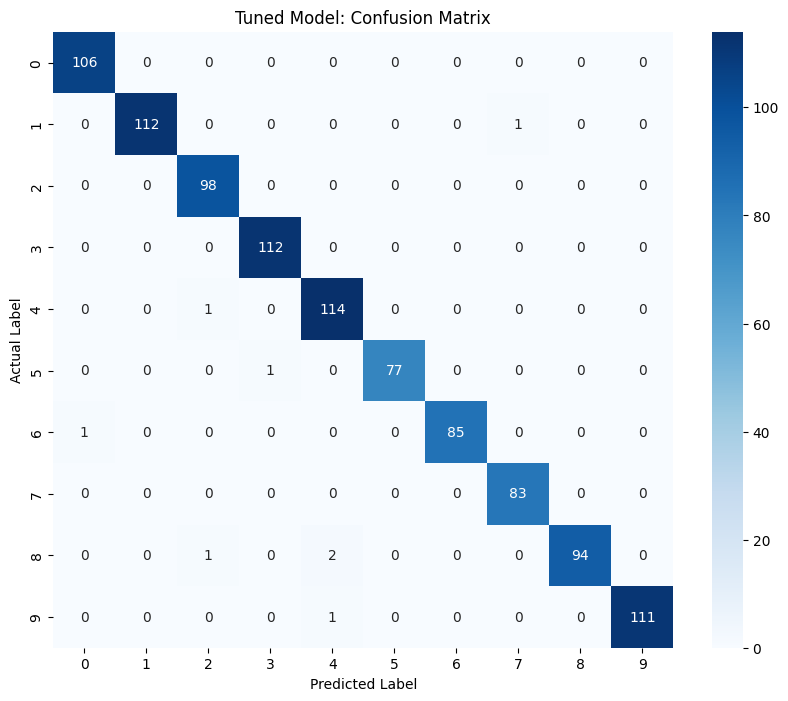

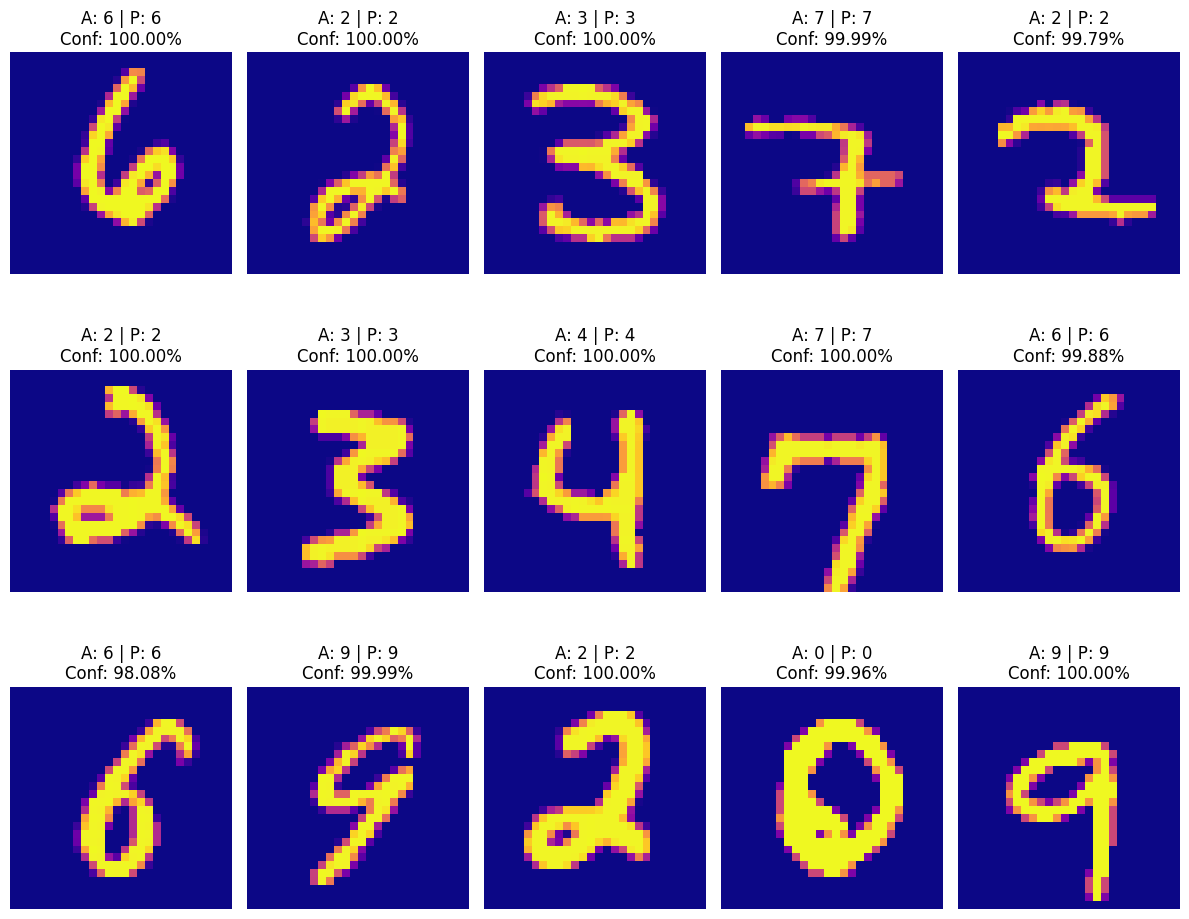

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

# ==========================================
# 1. DATA PREPARATION (Optimized)
# ==========================================
def load_and_preprocess(file_path):
    data = pd.read_csv(file_path)
    y = data.iloc[:, 0].values
    X = data.iloc[:, 1:].values.astype('float32') / 255.0
    X = X.reshape(-1, 28, 28, 1)
    return X, y

X_raw, y_raw = load_and_preprocess('mnist_test.csv')
X_train, X_val, y_train, y_val = train_test_split(X_raw, y_raw, test_size=0.1, random_state=42)

# DATA AUGMENTATION: This is the key "Tuning" step to increase accuracy
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)

# ==========================================
# 2. TUNED CNN ARCHITECTURE
# ==========================================
model = Sequential([
    # Block 1
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    # Block 2
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    # Final Dense Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

# Hyperparameter: Learning Rate Scheduler
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ==========================================
# 3. TRAINING WITH AUGMENTATION
# ==========================================
print("\nStarting Optimized Training with Hyperparameter Tuning...")
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=20, # Increased epochs for better convergence
                    validation_data=(X_val, y_val),
                    callbacks=[lr_reduction],
                    verbose=1)

# ==========================================
# 4. TUNED PERFORMANCE ANALYTICAL METRICS
# ==========================================
print("\n" + "="*40)
print("TUNED PERFORMANCE ANALYTICAL METRICS")
print("="*40)

loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Final Tuned Accuracy: {accuracy*100:.2f}%")

y_pred = np.argmax(model.predict(X_val), axis=1)
print("\nAdvanced Classification Report:")
print(classification_report(y_val, y_pred))

# ==========================================
# 5. TUNED VISUAL OUTPUTS
# ==========================================

# Visual 1: Confusion Matrix Heatmap (New for Analysis)
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Tuned Model: Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Visual 2: Detailed Prediction Grid
plt.figure(figsize=(12, 10))
for i in range(15):
    plt.subplot(3, 5, i+1)
    img = X_val[i].reshape(28, 28)
    actual = y_val[i]
    pred = y_pred[i]

    plt.imshow(img, cmap='plasma') # Changed color map for visual distinction
    plt.title(f"A: {actual} | P: {pred}\nConf: {np.max(model.predict(X_val[i:i+1], verbose=0)):.2%}")
    plt.axis('off')

plt.tight_layout()
plt.show()